In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras.layers.wrappers import TimeDistributed
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
from scipy import stats

Using Theano backend.


In [2]:
XchTrain = np.load("trainX.npy")
YTrain = np.load("trainY.npy")
XchVal = np.load("valX.npy")
YVal = np.load("valY.npy")
XchTest = np.load("testX.npy")
YTest = np.load("testY.npy")
# making test and train labels one hot
YintTrain = np.int64(YTrain)
YhotTrain = np.zeros((YTrain.shape[0], 6))
YhotTrain[np.arange(YTrain.shape[0]), YintTrain] = 1

YintTest = np.int64(YTest)
YhotTest = np.zeros((YTest.shape[0], 6))
YhotTest[np.arange(YTest.shape[0]), YintTest] = 1

YintVal = np.int64(YVal)
YhotVal = np.zeros((YVal.shape[0], 6))
YhotVal[np.arange(YVal.shape[0]), YintVal] = 1

YhotTest = np.repeat(YhotTest[:, :, np.newaxis], 45, axis=2)
YhotTest = np.swapaxes(YhotTest, 1, 2)

YhotVal = np.repeat(YhotVal[:, :, np.newaxis], 45, axis=2)
YhotVal = np.swapaxes(YhotVal, 1, 2)

YhotTrain = np.repeat(YhotTrain[:, :, np.newaxis], 45, axis=2)
YhotTrain = np.swapaxes(YhotTrain, 1, 2)

In [3]:
print XchTrain.shape
print YhotTrain.shape
print XchVal.shape
print YhotVal.shape
print XchTest.shape
print YhotTest.shape

(7989, 45, 18, 2)
(7989, 45, 6)
(2224, 45, 18, 2)
(2224, 45, 6)
(2598, 45, 18, 2)
(2598, 45, 6)


In [4]:
def get_model():
    model = Sequential([
        TimeDistributed(Conv1D(32,3, activation='relu', padding = "same"),input_shape=XchTrain.shape[1:]),
        TimeDistributed(BatchNormalization()),
        #TimeDistributed(MaxPooling1D()),
        TimeDistributed(Dropout(0.8)),
        #TimeDistributed(Conv1D(64,3, activation='relu',padding = "same")),
        BatchNormalization(),
        #TimeDistributed(Dropout(0.8)),
        TimeDistributed(Flatten()),
        #TimeDistributed(Dense(30,activation='softmax')),  
        LSTM(20,unit_forget_bias = 0.7, return_sequences = True),
        TimeDistributed(Dense(6,activation='softmax'))        
    ])
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [5]:
model = get_model()
filepath= "weights/" +"val-org" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data = (XchVal, YhotVal))

Train on 7989 samples, validate on 2224 samples
Epoch 1/100
7989/7989 [==============================] - 39s 5ms/step - loss: 0.3095 - acc: 0.9165 - val_loss: 0.0801 - val_acc: 0.9927

Epoch 00001: val_acc improved from -inf to 0.99269, saving model to weights/val-org-01-0.9927.hdf5
Epoch 2/100
7989/7989 [==============================] - 38s 5ms/step - loss: 0.0777 - acc: 0.9761 - val_loss: 0.0391 - val_acc: 0.9891

Epoch 00002: val_acc did not improve
Epoch 3/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0516 - acc: 0.9851 - val_loss: 0.0167 - val_acc: 0.9959

Epoch 00003: val_acc improved from 0.99269 to 0.99586, saving model to weights/val-org-03-0.9959.hdf5
Epoch 4/100
7989/7989 [==============================] - 44s 5ms/step - loss: 0.0294 - acc: 0.9923 - val_loss: 0.0128 - val_acc: 0.9962

Epoch 00004: val_acc improved from 0.99586 to 0.99617, saving model to weights/val-org-04-0.9962.hdf5
Epoch 5/100
7989/7989 [==============================] - 39s 5ms

7989/7989 [==============================] - 37s 5ms/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0033 - val_acc: 0.9987

Epoch 00042: val_acc did not improve
Epoch 43/100
7989/7989 [==============================] - 37s 5ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0014 - val_acc: 0.9994

Epoch 00043: val_acc did not improve
Epoch 44/100
7989/7989 [==============================] - 38s 5ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0016 - val_acc: 0.9994

Epoch 00044: val_acc did not improve
Epoch 45/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0019 - val_acc: 0.9993

Epoch 00045: val_acc did not improve
Epoch 46/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0018 - val_acc: 0.9994

Epoch 00046: val_acc did not improve
Epoch 47/100
7989/7989 [==============================] - 41s 5ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0025 - val_acc: 0.9990



7989/7989 [==============================] - 39s 5ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0017 - val_acc: 0.9993

Epoch 00089: val_acc did not improve
Epoch 90/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9991

Epoch 00090: val_acc did not improve
Epoch 91/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0018 - val_acc: 0.9992

Epoch 00091: val_acc did not improve
Epoch 92/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9991

Epoch 00092: val_acc did not improve
Epoch 93/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9992

Epoch 00093: val_acc did not improve
Epoch 94/100
7989/7989 [==============================] - 40s 5ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0017 - val_acc: 0.9994



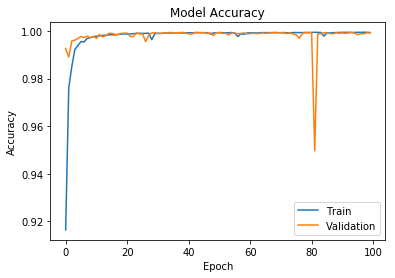

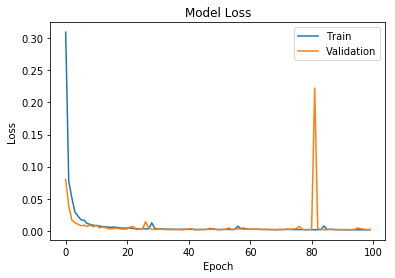

In [6]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
#plt.savefig('accHighorg.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
#plt.savefig('lossHighorg.svg')

In [6]:
model = get_model()
#load best weights from current training
model.load_weights("weights/val-100-0.9997.hdf5")

In [7]:
preds = model.predict(XchTest)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
Yhot_pred = model.predict(XchTest)
#convert them to class numbers


In [10]:
Y_pred = np.argmax(preds, axis = 2)
Y_test = np.argmax(YhotTest, axis = 2)
print Y_pred.shape
print Y_test.shape

(2598, 45)
(2598, 45)


In [11]:
ans = 0
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            if Y_test[i][j] == Y_pred[i][j]:
                ans = ans + 1    
print "Test Accuracy Framewise is"
#print ans
print(ans/float(Y_test.shape[0] * Y_test.shape[1]))*100  

Test Accuracy Framewise is
99.9401248824


In [20]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    resTemp = stats.mode(Y_pred[i])
    actTemp = stats.mode(Y_test[i])
    res.append(resTemp[0])
    act.append(actTemp[0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print "Test Accuracy with Polling is"
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
100.0


In [19]:
print res

[ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([43])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([44])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array([45])), ModeResult(mode=array([0]), count=array

In [14]:
Y_pred_flat = []
Y_test_flat = []
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            Y_pred_flat.append(Y_pred[i][j])
            Y_test_flat.append(Y_test[i][j])

In [18]:
asanas = {0:'bhujangasan', 1:'padamasan', 2:'shavasan', 3:'tadasan', 4:'trikonasan', 5:'vrikshasan'}
#uncomment for framewise
#Y_asanas = np.array([asanas[a] for a in Y_test_flat])
#Y_pred_asanas = np.array([asanas[a] for a in Y_pred_flat])
Y_asanas = np.array([asanas[a] for a in act])
Y_pred_asanas = np.array([asanas[a] for a in res])
print(Y_asanas)
print(Y_pred_asanas)

TypeError: unhashable type: 'numpy.ndarray'

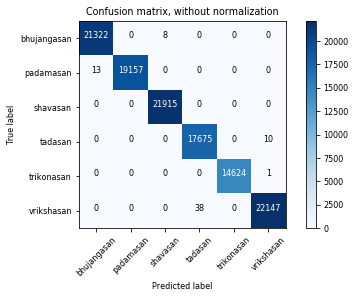

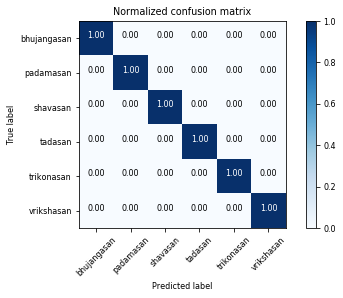

In [17]:
plt.rcParams.update({'font.size': 8})
class_names =[]
for k in range(6):
    class_names.append(asanas[k])
cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confHighOrgSeq.svg')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('nconfHighOrgSeq.svg')